# Data Import

In [48]:

import pandas as pd
url = r"C:\Users\shafi\OneDrive\Documents\Data analysis oamk\Assingment 1 with dataset\fraud_challenge_150k.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

# Feature importance 

### Out of 25 variables, 16 variables (including the target variable "EVENT_LABEL") were selected for model building and further data manipulation.

### Columns with Numeric data type:
- 0   account_age_days       149892 non-null  float64
- 1   transaction_amt        149870 non-null  float64
- 2   transaction_adj_amt    149886 non-null  float64
- 3   historic_velocity      149885 non-null  float64
- 23  days_since_last_logon  149864 non-null  float64
- 24  inital_amount          149872 non-null  float64

### Columns that need data manipulation for model building:
- 6   email_domain           149910 non-null  object #Modify it someway 
- 8   billing_city           149884 non-null  object #Modify it someway
- 10  billing_state          149887 non-null  object #Modify it someway
- 12  currency               149892 non-null  object #Modify it someway
- 13  cvv                    149877 non-null  object #Modify it someway
- 14  signature_image        149895 non-null  object #Modify it someway
- 15  transaction_type       149884 non-null  object #Modify it someway

### Additional columns:
- 21  tranaction_initiate    149874 non-null  object #Modify it someway
- 24  EVENT_LABEL            #Target variable


# Data selection and cleaning

In [49]:
#Data selection and cleaning
#Dropping out the columns which are not useful for the analysis

df = df.drop(columns=['ip_address','user_agent','phone_number','billing_postal','card_bin','EVENT_TIMESTAMP','applicant_name','billing_address','merchant_id','locale'], axis = 1)
df.head()



,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,perez-garza.com,Woodsburgh,California,cad,D,F,U,X,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,mcneil-ortega.com,West Kevin,Florida,cad,X,X,H,W,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,davis-calderon.com,Lorichester,Utah,cad,X,Q,X,X,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,rose-lee.org,Stephenmouth,Virginia,usd,G,G,C,N,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,nash.net,New Brianmouth,South Carolina,cad,X,F,F,G,K,21.0,1905.0,legit


# Checking missing value

In [50]:
missing_values = df.isnull().sum()
print(missing_values)

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
email_domain              90
billing_city             116
billing_state            113
currency                 108
cvv                      123
signature_image          105
transaction_type         116
transaction_env          123
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64


### Total missing value for each column
- account_age_days         108
- transaction_amt          130
- transaction_adj_amt      114
- historic_velocity        115
- email_domain              90
- billing_city             116
- billing_state            113
- currency                 108
- cvv                      123
- signature_image          105
- transaction_type         116
- transaction_env          123
- tranaction_initiate      126
- days_since_last_logon    136
- inital_amount            128
- EVENT_LABEL                0
dtype: int64

# Data Manipulation for Model Building

In this section, we will perform data manipulation tasks to prepare the dataset for model building. 

#### Columns with Alphabetical Parameter Values

We will assign numerical values to the following columns that have alphabetical parameter values:

- 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'tranaction_initiate'

#### Tokenization of Other Columns

We will tokenize the following columns to convert them into numerical format:

- 'email_domain', 'billing_city', 'billing_state', 'currency'

Let's proceed with the data manipulation tasks to prepare the dataset for model building.


In [51]:
#Data manupulation

#Columns where perameter values are alphabetical assinging them to numerical values

#'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'tranaction_initiate'
df = df.replace({'transaction_env' : {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'cvv' : {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'signature_image' : {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'transaction_type' : {chr(i + 64): i for i in range(1, 27)}})
df = df.replace({'tranaction_initiate' : {chr(i + 64): i for i in range(1, 27)}})


#tokenizations of the columns
#'email_domain', 'billing_city', 'billing_state', 'currency'
df['email_domain']=df.groupby('email_domain')['email_domain'].transform('count')
df['billing_city']=df.groupby('billing_city')['billing_city'].transform('count')
df['billing_state']=df.groupby('billing_state')['billing_state'].transform('count')
df['currency']=df.groupby('currency')['currency'].transform('count')

df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,46.0,43.0,7813.0,113751.0,4.0,6.0,21.0,24.0,15.0,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,38.0,38.0,5115.0,113751.0,24.0,24.0,8.0,23.0,10.0,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,23.0,30.0,6591.0,113751.0,24.0,17.0,24.0,24.0,20.0,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,22.0,27.0,6756.0,31768.0,7.0,7.0,3.0,14.0,13.0,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,45.0,32.0,2826.0,113751.0,24.0,6.0,6.0,7.0,11.0,21.0,1905.0,legit


# Fixing labels for the target variable
To prepare the target variable for our fraud detection model, we need to fix the labels. In our dataset, the label for legitimate transactions is currently set to 0, and the label for fraudulent transactions is set to 1.

To ensure consistency and clarity, we will update the labels as follows:

- For legitimate transactions: Set the label to 0.
- For fraudulent transactions: Set the label to 1.

This adjustment will help us accurately train and evaluate our fraud detection model. Let's proceed with fixing the labels for the target variable.


In [52]:
#Fixing labels for the target variable
df.loc[df['EVENT_LABEL'].str.contains('legit', na=False), 'EVENT_LABEL'] = 0
df.loc[df['EVENT_LABEL'].str.contains('fraud', na=False), 'EVENT_LABEL'] = 1
df['EVENT_LABEL'] = df['EVENT_LABEL'].astype(int)

df.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,46.0,43.0,7813.0,113751.0,4.0,6.0,21.0,24.0,15.0,59.0,13646.0,0
1,2714.0,2045.0,48.0,4517.0,38.0,38.0,5115.0,113751.0,24.0,24.0,8.0,23.0,10.0,0.0,11930.0,0
2,6987.0,2892.0,61.0,5007.0,23.0,30.0,6591.0,113751.0,24.0,17.0,24.0,24.0,20.0,83.0,7412.0,0
3,2712.0,3040.0,28.0,6022.0,22.0,27.0,6756.0,31768.0,7.0,7.0,3.0,14.0,13.0,24.0,4623.0,0
4,3598.0,2976.0,66.0,2600.0,45.0,32.0,2826.0,113751.0,24.0,6.0,6.0,7.0,11.0,21.0,1905.0,0


## Class Balance Check

Before proceeding with the fraud detection using XGBoost, it is important to check the class balance of the target variable. Class imbalance occurs when the number of instances in one class is significantly higher or lower than the other class. In this case, we want to ensure that we have a balanced dataset to train our model effectively.

Let's check the class balance of the target variable "EVENT_LABEL" in our dataset.


In [53]:
df['EVENT_LABEL'].value_counts()

EVENT_LABEL
0    141836
1      8164
Name: count, dtype: int64

## Importing ML libraries

In this cell, we import the necessary machine learning libraries that will be used for fraud detection using XGBoost. These libraries include:

- `matplotlib.pyplot`: A plotting library for creating visualizations.
- `matplotlib.pylab.rcParams`: A module for customizing matplotlib settings.
- `numpy`: A library for numerical operations in Python.
- `sklearn.model_selection.train_test_split`: A function for splitting the dataset into training and testing data.
- `sklearn.metrics`: A module for evaluating the performance of the model.
- `shap`: A library for interpreting and explaining machine learning models.
- `xgboost`: A library for gradient boosting algorithms.

By importing these libraries, we ensure that we have access to the necessary functions and methods for building and evaluating our XGBoost model for fraud detection.


In [7]:
#Import ML libraries
import matplotlib.pyplot  as plt 
from matplotlib.pylab import rcParams 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap
import xgboost 
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
#Graphviz needs to be installed


# Train-Test Split
To evaluate the performance of our XGBoost model for fraud detection, we need to split our dataset into training and testing data. 

- Training Data: 70% of the dataset will be used for training the model.
- Testing Data: 30% of the dataset will be used for evaluating the model's performance.

This split ensures that we have enough data to train the model effectively while also having a separate set of data to assess its accuracy and generalization capabilities.

Let's proceed with the train-test split and continue with the model evaluation.


In [9]:

Y = df['EVENT_LABEL'] #Target

dfx = df.drop(columns=['EVENT_LABEL'], axis = 1) #Features
df_columns = dfx.columns #Feature columns
X = dfx.apply(pd.to_numeric) #Features in numerical format

#Normalize the data if needed

#Divide data to test and train groups
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.7) #Creates numpy arrays


X_train = pd.DataFrame(data = X_train, columns = df_columns)
X_test = pd.DataFrame(data = X_test, columns = df_columns)
X_train.head()



,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,email_domain,billing_city,billing_state,currency,cvv,signature_image,transaction_type,transaction_env,tranaction_initiate,days_since_last_logon,inital_amount
31121,6114.0,2916.0,53.0,5647.0,22.0,21.0,7242.0,113751.0,3.0,19.0,15.0,9.0,26.0,82.0,10137.0
70857,5439.0,2120.0,61.0,4178.0,56.0,3.0,2826.0,113751.0,19.0,23.0,21.0,3.0,18.0,40.0,5856.0
148719,4199.0,2022.0,71.0,4179.0,44.0,20.0,8628.0,113751.0,26.0,9.0,8.0,7.0,26.0,46.0,7476.0
124833,4016.0,1999.0,54.0,1454.0,42.0,21.0,309.0,113751.0,23.0,21.0,23.0,4.0,12.0,87.0,2625.0
72053,4319.0,1961.0,46.0,5019.0,37.0,12.0,8040.0,113751.0,23.0,6.0,7.0,4.0,19.0,40.0,7708.0


# Randomized Search for Best Hyperparameters

In this section, we perform a randomized search to find the best hyperparameters for our XGBoost model. Hyperparameters are adjustable parameters that are not learned from the data, but rather set by the user before training the model. Finding the optimal combination of hyperparameters can significantly improve the performance of the model.

To perform the randomized search, we define a parameter grid that includes different values for various hyperparameters. We then use the `RandomizedSearchCV` function from the `sklearn.model_selection` module to search over the parameter grid and evaluate the performance of each combination of hyperparameters using the F1 score as the evaluation metric.

The best hyperparameters found through the randomized search are printed, and the best model can be retrieved for further analysis and evaluation.

Let's proceed with the randomized search for the best hyperparameters.


In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define the scorer to use for hyperparameter tuning
scorer = make_scorer(f1_score)

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.01, 0.02, 0.05],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]  # You can fine-tune this based on your class imbalance
}

# Create the XGBClassifier instance
xgb_model = xgb.XGBClassifier(objective='binary:logistic', tree_method='hist', n_jobs=-1, random_state=10)

# Set up the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_grid, 
    n_iter=100, 
    scoring=scorer, 
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Perform the random search and fit the model
random_search.fit(X_train, y_train)

# The best hyperparameters from RandomizedSearchCV
print("Best hyperparameters found: ", random_search.best_params_)

# Retrieve the best model
#best_model = random_search.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters found:  {'subsample': 0.9, 'scale_pos_weight': 3, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}


# Model Building

In this section, we will focus on building the fraud detection model using XGBoost. We have already performed data selection, cleaning, and manipulation tasks to prepare the dataset for model building.

The steps involved in model building are as follows:

1. Train-Test Split: We split the dataset into training and testing data to evaluate the performance of the model.

2. Randomized Search for Best Hyperparameters: We perform a randomized search to find the best hyperparameters for our XGBoost model. Hyperparameters are adjustable parameters that significantly impact the model's performance.

3. Fit the Model: We fit the XGBoost model with the best hyperparameters found through the randomized search.

Let's proceed with the model building process.


In [54]:
#Modelling
model = xgboost.XGBClassifier(
    subsample=0.9, 
    scale_pos_weight=3, 
    n_estimators=300, 
    min_child_weight=1, 
    max_depth=7,        
    learning_rate=0.05, 
    gamma=0.5,            
    colsample_bytree=0.7, 
    objective='binary:logistic', 
    tree_method='hist',  
    n_jobs=-1, 
    random_state=10 
    ) #Hyperparameters inside the brackets

#Fit the model
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=10, ...)

# Model Performance

In this section, we will evaluate the performance of our fraud detection model built using XGBoost. We have completed the data selection, cleaning, manipulation, and model building steps.

The key steps involved in evaluating the model performance are:

1. Importing Evaluation Metrics: Import necessary evaluation metrics from `sklearn.metrics`.

2. Making Predictions: Use the trained model to make predictions on the test data.

3. Evaluating Accuracy: Calculate and analyze evaluation metrics such as accuracy, precision, recall, and F1 score.

4. Interpreting Feature Importance: Use the SHAP library to interpret and understand the importance of different features.

Let's proceed with evaluating the performance of our fraud detection model.


In [11]:
print('The model accuracy on training data is:', np.round(model.score(X_train, y_train),3))
print('The model accuracy on testing data is:', np.round(model.score(X_test, y_test),3))

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print('The model precision on testing data is:', np.round(precision,3))
print('The model recall on testing data is:', np.round(recall,3))
print('The model F1 score on testing data is:', np.round(f1_score,3))

The model accuracy on training data is: 0.991
The model accuracy on testing data is: 0.983
The model precision on testing data is: 0.895
The model recall on testing data is: 0.788
The model F1 score on testing data is: 0.838


## Model Performance

Based on the evaluation of our fraud detection model using XGBoost, we obtained the following results:

- Accuracy on training data: 99.1%
- Accuracy on testing data: 98.3%
- Precision on testing data: 89.5%
- Recall on testing data: 78.8%
- F1 score on testing data: 83.8%

These metrics provide insights into the performance of our model in detecting fraudulent transactions. The high accuracy and precision indicate that the model is effective in identifying legitimate transactions correctly. However, the slightly lower recall suggests that there is room for improvement in detecting all fraudulent transactions.

Further analysis and fine-tuning of the model can be done to enhance its performance and achieve better results.


# Confusion Matrix

In the context of fraud detection using XGBoost, a confusion matrix is a useful tool for evaluating the performance of the model. It provides a summary of the predictions made by the model compared to the actual labels.

A confusion matrix consists of four key metrics:

- True Positive (TP): The number of fraudulent transactions correctly identified by the model.
- True Negative (TN): The number of legitimate transactions correctly identified by the model.
- False Positive (FP): The number of legitimate transactions incorrectly classified as fraudulent by the model.
- False Negative (FN): The number of fraudulent transactions incorrectly classified as legitimate by the model.

The confusion matrix helps us understand the trade-off between precision and recall. It allows us to assess the model's ability to correctly identify fraudulent transactions while minimizing false positives.

Let's proceed with generating the confusion matrix for our fraud detection model.


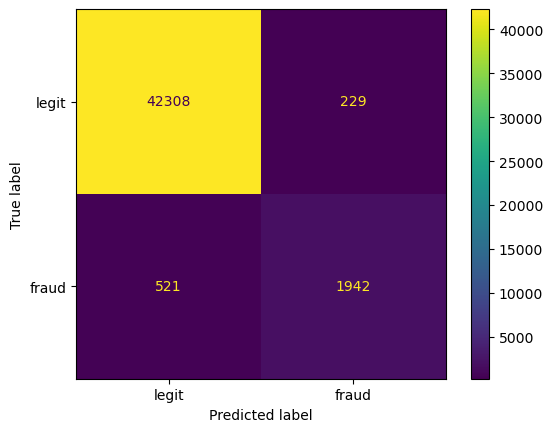

In [12]:
#Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=['legit','fraud'])
cm.plot()

# Decision tree

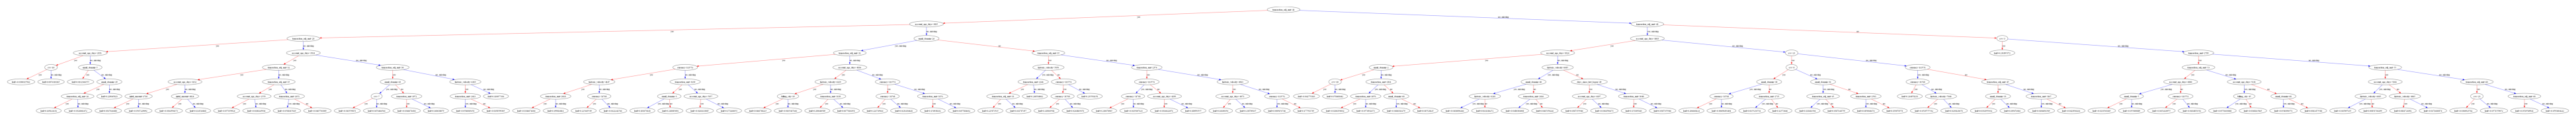

In [13]:
#Show the decision tree
rcParams['figure.figsize'] = 50,20
xgboost.plot_tree(model, fontsize = 20)
plt.show()

# Shap Analysis


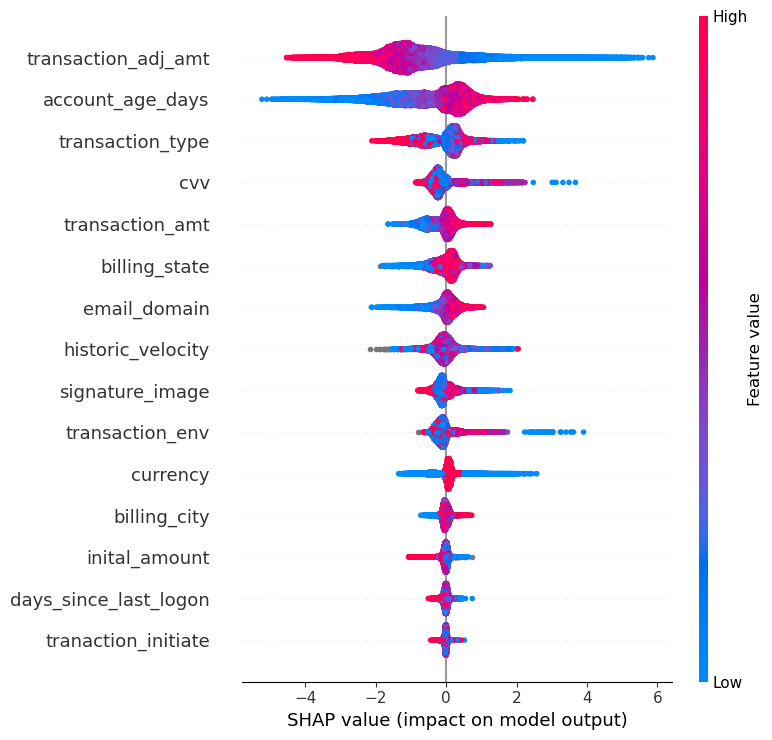

In [14]:
#SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)


# Importance of parameters

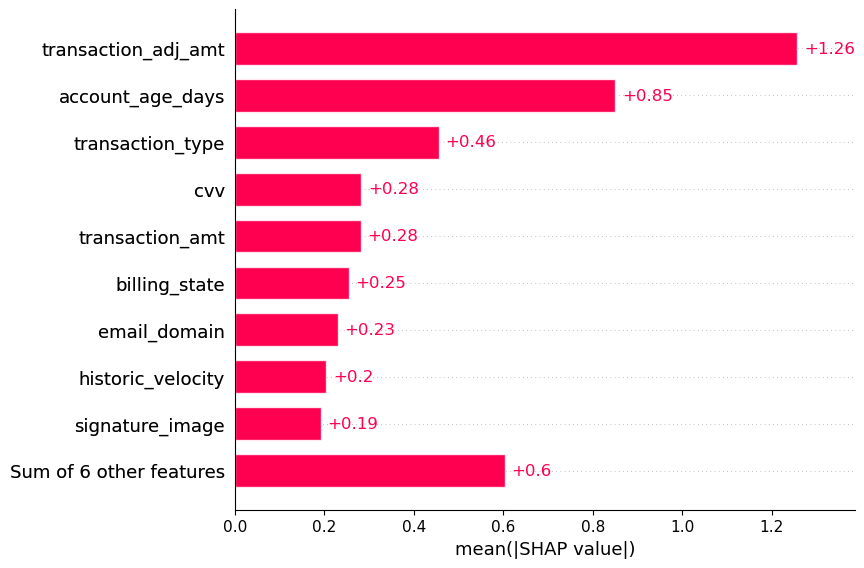

In [15]:
#Show the importance of parameters
values = explainer(X_test)
shap.plots.bar(values)